<a href="https://colab.research.google.com/github/robins645/ML_Project/blob/main/Number_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
df=pd.read_csv('/content/mnist_test.csv')

In [46]:
df

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
labels = df.iloc[:, 0].values
features = df.iloc[:, 1:].values


In [49]:
features = features / 255.0


In [50]:
features = features.reshape(-1, 28, 28, 1)

In [51]:
labels_categorical = to_categorical(labels, num_classes=10)

In [52]:
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)
print("One-hot Labels shape:", labels_categorical.shape)

Features shape: (9999, 28, 28, 1)
Labels shape: (9999,)
One-hot Labels shape: (9999, 10)


In [54]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    features, labels_categorical, test_size=0.2, random_state=42)

model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.5958 - loss: 1.2700 - val_accuracy: 0.9410 - val_loss: 0.1975
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.9222 - loss: 0.2580 - val_accuracy: 0.9620 - val_loss: 0.1170
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.9515 - loss: 0.1550 - val_accuracy: 0.9720 - val_loss: 0.0943
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - accuracy: 0.9626 - loss: 0.1145 - val_accuracy: 0.9780 - val_loss: 0.0802
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.9689 - loss: 0.0790 - val_accuracy: 0.9765 - val_loss: 0.0802
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.9747 - loss: 0.0789 - val_accuracy: 0.9830 - val_loss: 0.0660
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.9794 - loss: 0.0610 - val_accuracy: 0.9865 - val_loss: 0.0562
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.9836 - loss: 0.0533 - val_

In [56]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9886 - loss: 0.0546
Test accuracy: 0.9875


In [57]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test)
)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 0.9878 - loss: 0.0373 - val_accuracy: 0.9825 - val_loss: 0.0663
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.9868 - loss: 0.0352 - val_accuracy: 0.9885 - val_loss: 0.0578
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.9897 - loss: 0.0278 - val_accuracy: 0.9825 - val_loss: 0.0701
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.9886 - loss: 0.0289 - val_accuracy: 0.9805 - val_loss: 0.0697
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.9914 - loss: 0.0275 - val_accuracy: 0.9890 - val_loss: 0.0595
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.9926 - loss: 0.0202 - val_accuracy: 0.9880 - val_loss: 0.0616
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.9921 - loss: 0.0253 - val_accuracy: 0.9895 - val_loss: 0.0581
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.9927 - loss: 0.0223 - val_

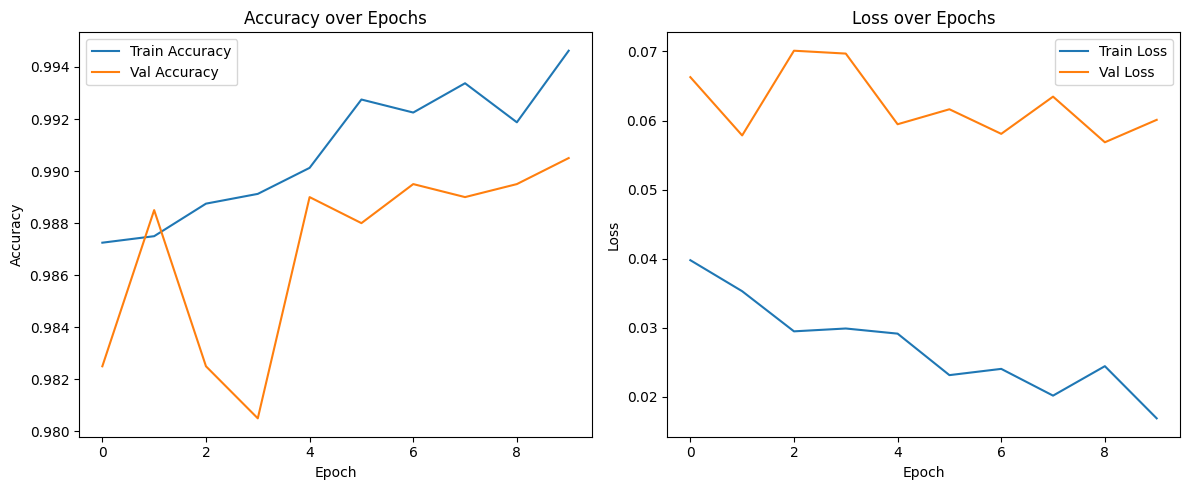

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7146 - loss: 0.9435 - val_accuracy: 0.9250 - val_loss: 0.2756
Epoch 2/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9270 - loss: 0.2402 - val_accuracy: 0.9425 - val_loss: 0.1872
Epoch 3/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9636 - loss: 0.1249 - val_accuracy: 0.9585 - val_loss: 0.1471
Epoch 4/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9732 - loss: 0.0895 - val_accuracy: 0.9505 - val_loss: 0.1535
Epoch 5/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9789 - loss: 0.0658 - val_accuracy: 0.9610 - val_loss: 0.1530
Epoch 6/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9867 - loss: 0.0470 - val_accuracy: 0.9550 - val_loss: 0.1708
Epoch 7/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9900 - loss: 0.0325 - val_accuracy: 0.9650 - val_loss: 0.1346
Epoch 8/15
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9897 - loss: 0.0304 - val_accu

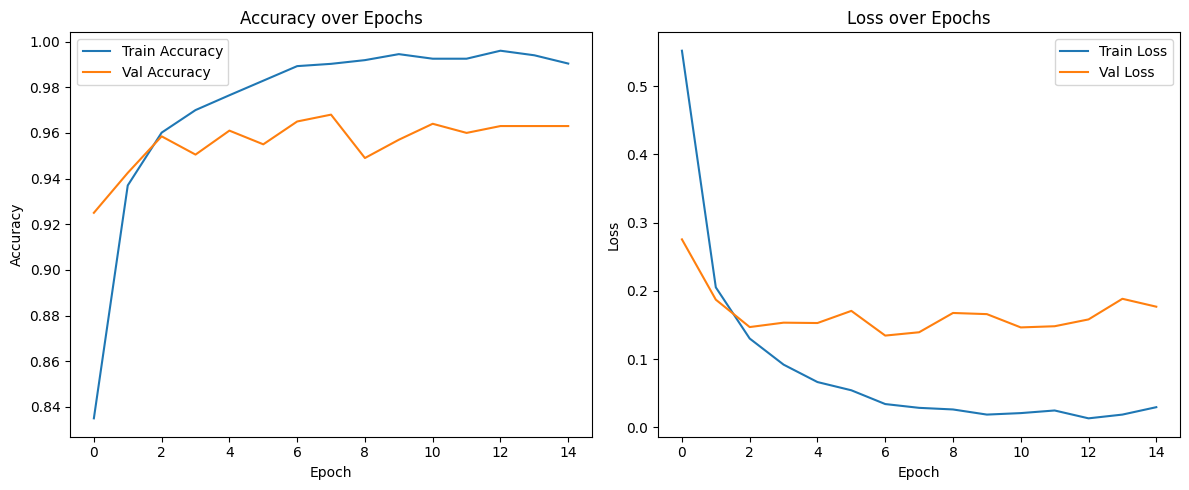

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9688 - loss: 0.1521
Final Test Accuracy: 0.9630


In [59]:
df = pd.read_csv('mnist_test.csv')
labels = df.iloc[:, 0].values
features = df.iloc[:, 1:].values / 255.0  # Normalize
labels_categorical = to_categorical(labels, num_classes=10)

X_train, X_test, y_train, y_test = train_test_split(
    features, labels_categorical, test_size=0.2, random_state=42)

model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=15,
                    batch_size=64,
                    validation_data=(X_test, y_test))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {accuracy:.4f}")


In [60]:
from tensorflow.keras.models import load_model
from PIL import Image
from tensorflow.keras.models import load_model
from PIL import Image
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_array = np.array(img)
    img_array = 255 - img_array
    img_array = img_array / 255.0
    img_array = img_array.flatten().reshape(1, 784)
    return img_array
    img_array = np.array(img)
    img_array = 255 - img_array
    img_array = img_array / 255.0
    img_array = img_array.flatten().reshape(1, 784)
    return img_array

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


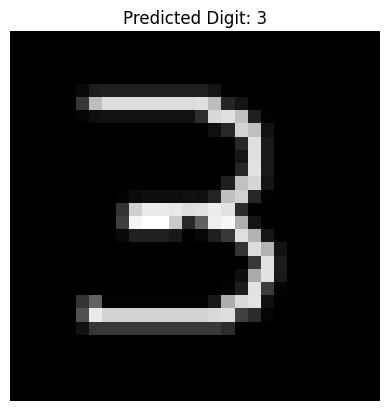

In [61]:
image_path = '/content/images.png'
processed_image = preprocess_image(image_path)
prediction = model.predict(processed_image)
predicted_digit = np.argmax(prediction)
plt.imshow(processed_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()